In [347]:
import pandas as pd 
from matplotlib import pyplot as plt 


In [349]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

In [351]:
#print(steel.head())
#print(wood.head())
print(wood.columns)
print(wood.head())

Index(['Rank', 'Name', 'Park', 'Location', 'Supplier', 'Year Built', 'Points',
       'Year of Rank'],
      dtype='object')
   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [353]:
name_1 = wood.loc[wood['Name'] == 'El Toro']
name_2 = name_1.loc[name_1['Location'] == 'Jackson, N.J.']
print(name_2)
years_ranked = (list(range(name_2['Year of Rank'].count())))
print(years_ranked)
scores_over_years = list(name_2['Rank'])
print(scores_over_years)




     Rank     Name                       Park       Location Supplier  \
1       2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
11      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
21      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
32      3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
80      1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
131     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

     Year Built  Points  Year of Rank  
1          2006    1302          2013  
11         2006    1291          2014  
21         2006    1464          2015  
32         2006    1121          2016  
80         2009    1241          2017  
131        2006    1197          2018  
[0, 1, 2, 3, 4, 5]
[2, 2, 2, 3, 1, 2]


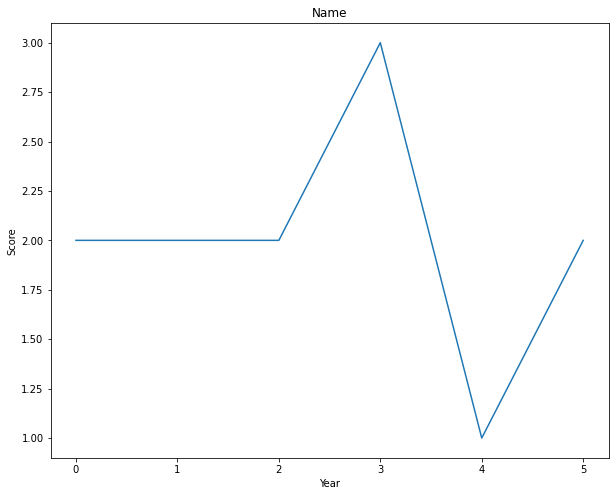

In [355]:
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(years_ranked, scores_over_years)
plt.title('Name')
plt.xlabel('Year')
plt.ylabel('Score')

plt.show()

In [357]:
#The goal here is to automate this process by writing a function that will take the name and location of a coaster as inputs and return a graph of the coaster's score and then rank over time.

def coast_score_plot(name, location):
    name_1 = wood.loc[wood['Name'] == name]
    name_2 = name_1.loc[name_1['Location'] == location]
    
    years_ranked = (list(range(name_2['Year of Rank'].count())))
   
    scores_over_years = list(name_2['Points'])
    
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    plt.plot(years_ranked, scores_over_years)
    plt.title(name)
    plt.xlabel('Year')
    plt.ylabel('Score')

    plt.show()

def coast_rank_plot(name, location):
    name_1 = wood.loc[wood['Name'] == name]
    name_2 = name_1.loc[name_1['Location'] == location]
    
    years_ranked = (list(range(name_2['Year of Rank'].count())))
   
    scores_over_years = list(name_2['Rank'])
    
    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    plt.plot(years_ranked, scores_over_years)
    plt.title(name)
    plt.xlabel('Year')
    plt.ylabel('Score')

    plt.show()



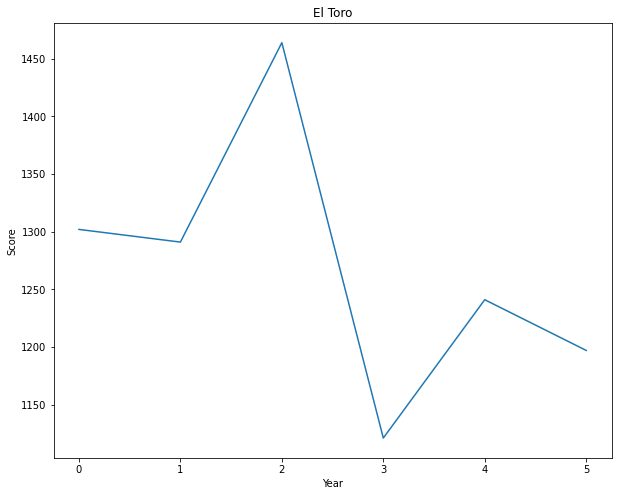

In [359]:
coast_score_plot('El Toro', 'Jackson, N.J.')

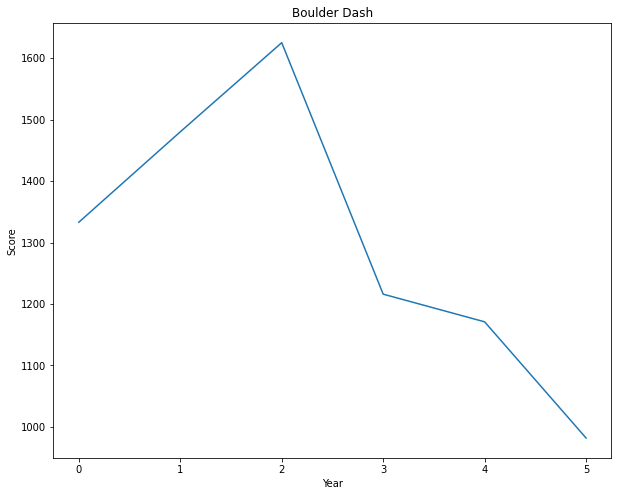

In [361]:
coast_score_plot('Boulder Dash', 'Bristol, Conn.')

In [363]:
def coast_compare_score_plot(name1, location1, name2, location2):
    name_1_1 = wood.loc[wood['Name'] == name1]
    name_2_1 = name_1_1.loc[name_1_1['Location'] == location1]
    
    years_ranked_1 = (list(range(name_2_1['Year of Rank'].count())))
   
    scores_over_years_1 = list(name_2_1['Points'])
    
    name_1_2 = wood.loc[wood['Name'] == name2]
    name_2_2 = name_1_2.loc[name_1_2['Location'] == location2]
    
    years_ranked_2 = (list(range(name_2_2['Year of Rank'].count())))
   
    scores_over_years_2 = list(name_2_2['Points'])
    


    plt.figure(figsize=(10,8))
    ax = plt.subplot()
    plt.plot(years_ranked_1, scores_over_years_1, color = 'blue')
    plt.plot(years_ranked_2, scores_over_years_2, color = 'red')
    plt.title('Coaster Compare')
    plt.xlabel('Year')
    plt.ylabel('Score')
    ax.set_xticks(range(len(years_ranked_1)))
    ax.set_xticklabels(years_ranked_1)

    plt.show()

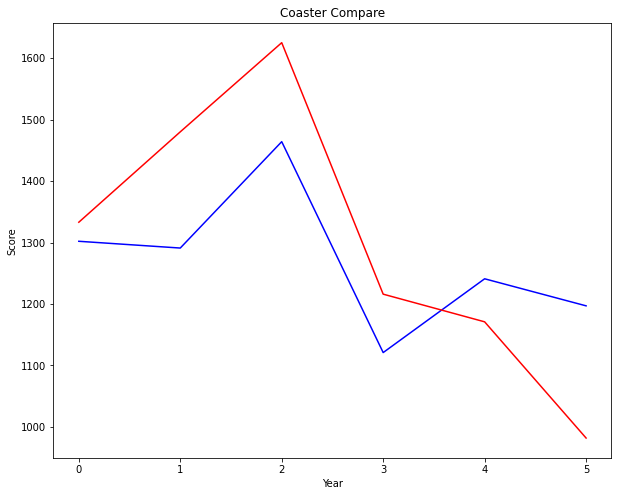

In [365]:
coast_compare_score_plot('El Toro', 'Jackson, N.J.', 'Boulder Dash', 'Bristol, Conn.')

In [367]:
#Now to write a program that will take the top 5 ranked coasters of a given year and graph their total points over the length of time they have been rated.abs

#First I need to sort the top 5 coasters of a given year
wood_by_year_of_rank = wood.loc[wood['Year of Rank'] == 2013]
#print(wood_by_year_of_rank)
wood_by_year_of_rank_sorted = wood_by_year_of_rank.sort_values(by=['Rank'], ascending=True)
#print(wood_by_year_of_rank_sorted)

#Now to select the top 5 coasters of the specified year.
number_of_coasters = list(range(5))
#print(number_of_coasters)
lst_of_coasters_to_graph = wood_by_year_of_rank_sorted.iloc[number_of_coasters]
print(lst_of_coasters_to_graph)
#So now that I can select the top n coasters of a given year, I need to select the relevant information to graph: points and the year. I need to first isolate each row from the grouped and sorted datafile and take enough information to be able to go back into the original dataframe of coasters to select the correct the coaster. This is complicated by the fact that some parks have coasters of the same name. In order to avoid selecting multiple coasters of the same name, I need to also use loaction.
first_coaster = list(lst_of_coasters_to_graph.loc[0])
first_coaster_name = first_coaster[1:3]
#print(first_coaster_name)
first_coaster_data = wood[(wood['Name'] == first_coaster_name[0]) & (wood['Park'] == first_coaster_name[1])]
print(first_coaster_data)
scores_to_graph = list(first_coaster_data['Points'])
print(first_coaster_name)
print(scores_to_graph)



   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
     Rank          Name            Park        Location         Supplier  \
0       1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI   
10      1  Boulder Dash  Lake Compounce  Bristol, Conn.              CCI 

In [369]:
#Now I want to get the label I will use for each line on the graph which will be the coaster name concatenated with its location (i.e., two columns of the selected row)
name_to_graph = "-".join(first_coaster_name)
print(name_to_graph)

Boulder Dash-Lake Compounce


In [371]:
#Now to automate this given a specificied n number of the top ranked coasters to compare of a given year over the course of the raitings.
def graph_to_compare_top_coasters(number_to_compare, year_of_rank):
    wood_by_year_of_rank = wood.loc[wood['Year of Rank'] == year_of_rank]
    wood_by_year_of_rank_sorted = wood_by_year_of_rank.sort_values(by=['Rank'], ascending=True)
    number_of_coasters = list(range(number_to_compare))
    lst_of_coasters_to_graph = wood_by_year_of_rank_sorted.iloc[number_of_coasters]
    print(lst_of_coasters_to_graph)
    #print(list(lst_of_coasters_to_graph['Name']))
    plt.figure(figsize=(20,16))
    ax = plt.subplot()
    plt.title('Coaster Compare')
    plt.xlabel('Year')
    plt.ylabel('Score')
    x = [1, 2, 3, 4, 5, 6]
    ax.set_xticks(x)
    ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018'])
    for i in number_of_coasters:
        coaster_info = list(lst_of_coasters_to_graph.iloc[i])           
        coaster_name = coaster_info[1:3]
        coaster_data = wood[(wood['Name'] == coaster_name[0]) & (wood['Park'] == coaster_name[1])]
        scores_to_graph = list(coaster_data['Points'])
        plt.plot(list(range(len(scores_to_graph))), scores_to_graph, label=coaster_name)
    plt.legend()
    plt.show()
    

    Rank             Name                        Park             Location  \
80     1          El Toro   Six Flags Great Adventure        Jackson, N.J.   
81     2          Phoenix   Knoebels Amusement Resort        Elysburg, Pa.   
82     3     Boulder Dash              Lake Compounce       Bristol, Conn.   
83     4           Voyage               Holiday World    Santa Claus, Ind.   
84     5    Lightning Rod                   Dollywood  Pigeon Forge, Tenn.   
85     6            Beast                Kings Island          Mason, Ohio   
86     7  Ravine Flyer II                   Waldameer            Erie, Pa.   
87     8      Thunderhead                   Dollywood  Pigeon Forge, Tenn.   
88     9       Outlaw Run          Silver Dollar City         Branson, Mo.   
89    10     Gold Striker  California’s Great America  Santa Clara, Calif.   

               Supplier  Year Built  Points  Year of Rank  
80              Intamin        2009    1241          2017  
81     Dinn-PTC/Schme

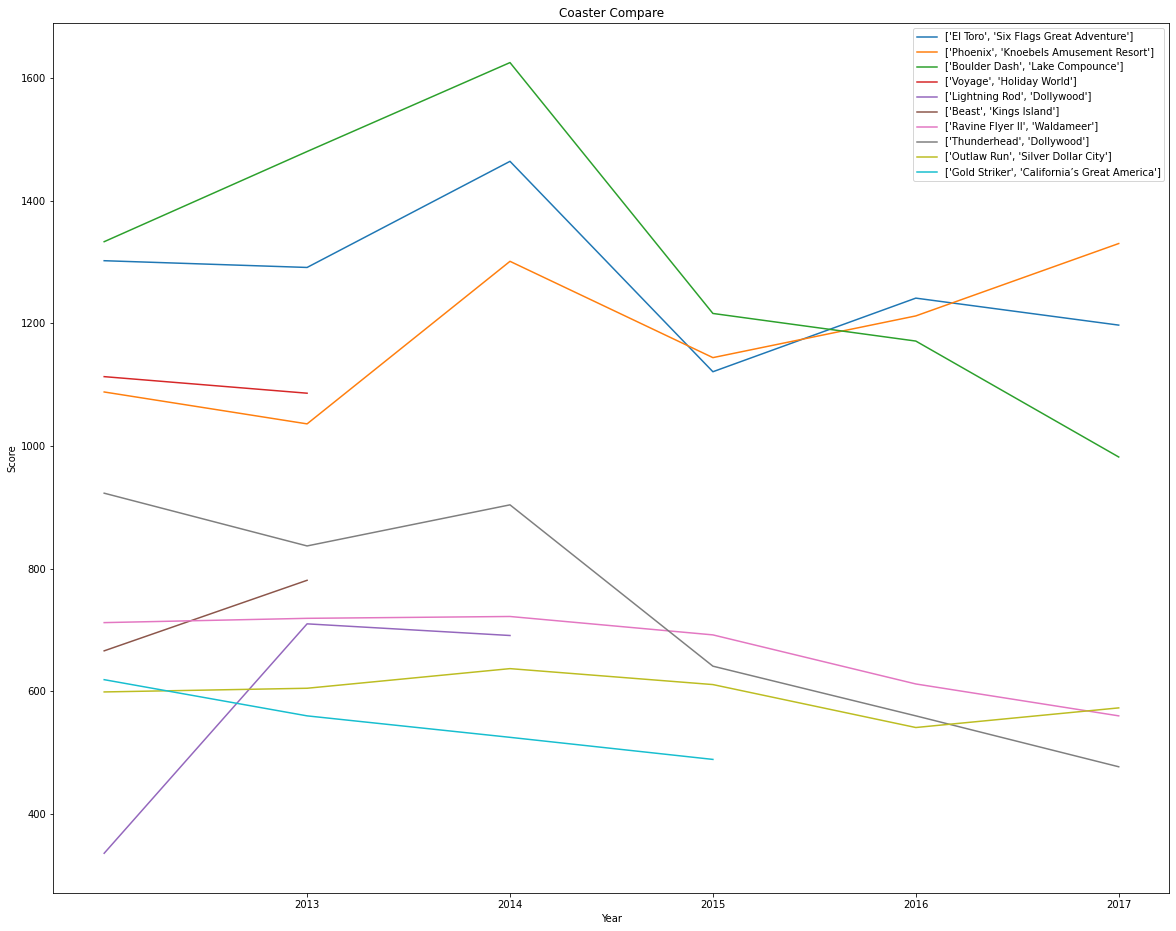

In [373]:
#So running the function with inputs of 10 and 2017 would take the top ten ranked coaseters of 2017 and plot their individuals scores over the years. This allows you to compare not just their popularity but their staying power as things like novelty and competition affect their popularity. 
graph_to_compare_top_coasters(10, 2017)

In [375]:
#We now want to use a histogram to aggregate data on specific attributes of coasters so that we can get a sense of how many coasters have how many of a specified attribute.
roller_coasters = pd.read_csv('roller_coasters.csv')
print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


0       75.0
1       45.0
2       30.0
3       85.0
4       55.0
        ... 
2767     0.0
2771     0.0
2773     0.0
2799    80.0
2801     0.0
Name: speed, Length: 1575, dtype: float64


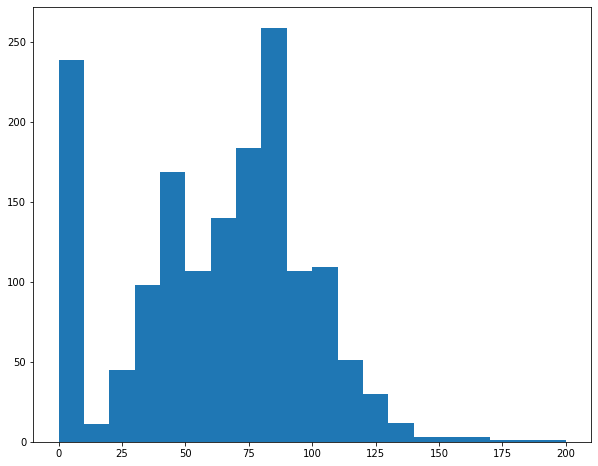

In [393]:
#First we have to get rid of any NaN entries. I will set these to 0 which will result in a pop in the data at this point. This will allow the graph to represent those entries (showing how many there were which lacked this info) without affecting the 
roller_coasters_new['speed'] = roller_coasters['speed'].fillna(0)
speed_data = roller_coasters_new['speed']
print(speed_data)
plt.figure(figsize=(10,8))
plt.hist(speed_data, range=(0, 200), bins=20)
plt.show()

In [417]:
#Now we want to write a function that will take a column name as an imput and generate a histogram of the information

def coaster_histogram(column_name):
    rollar_coasters = roller_coasters
    roller_coaseters_dropped_na = roller_coasters.dropna() 
    data = roller_coaseters_dropped_na[column_name]
    plt.figure(figsize=(10,8))
    plt.hist(data, range=(0, 200), bins=20)
    plt.show()

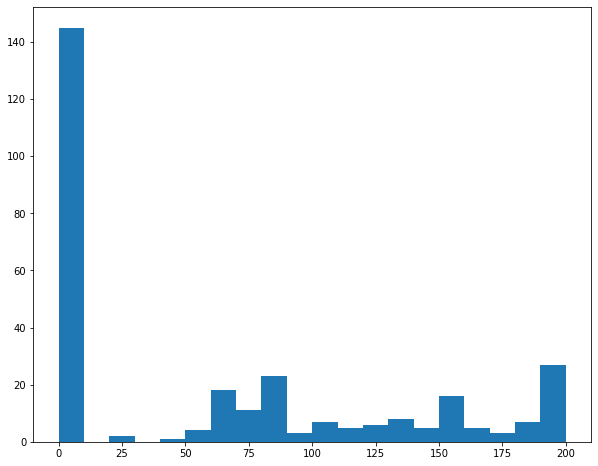

In [418]:
coaster_histogram('length')

In [430]:
#It looks like there are so many entries with NaN that including them is throwing off our abiity to use the data that we do have. Let's change the function so that it excludes NaN entries rather than filling it in. The easiest way to do this is to change the range to exlude numbers so small that they couldn't apply to roller coasters.

def coaster_histogram_2(column_name):
    roller_coasters_new = roller_coasters.dropna()
    data = roller_coasters_new[column_name]
    plt.figure(figsize=(10,8))
    plt.hist(data, range=(1, 500), bins=100)
    plt.show()

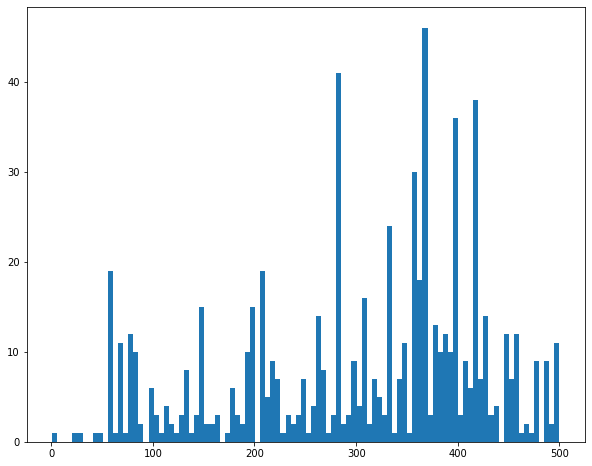

In [431]:
coaster_histogram_2('length')

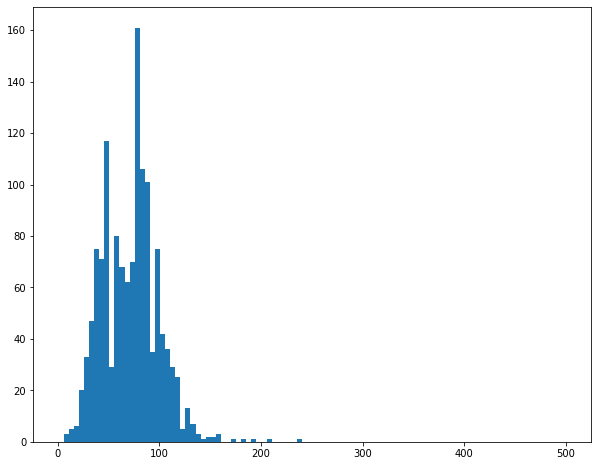

In [432]:
coaster_histogram_2('speed')

In [488]:
# Next, we want to create a bar chart to compare the total number of inversions a visitor could experience at different amusement parks. To begin, we will need to group the data by amusement park and then sum the total number of inversions at that park. 

parks = roller_coasters.groupby('park')
#print(parks.head())
inversion_by_parks = parks.num_inversions.count()
inversion_by_parks_sorted = inversion_by_parks.sort_values(ascending=False)
#print(inversion_by_parks_sorted.head(10))
#print(list(inversion_by_parks_sorted))
print(inversion_by_parks_sorted[0:10])


park
Foire                       112
Six Flags Magic Mountain     24
Kings Island                 23
Cedar Point                  22
Blackpool Pleasure Beach     18
Canada's Wonderland          18
Six Flags Great America      18
Carowinds                    17
Kings Dominion               17
Alton Towers                 17
Name: num_inversions, dtype: int64


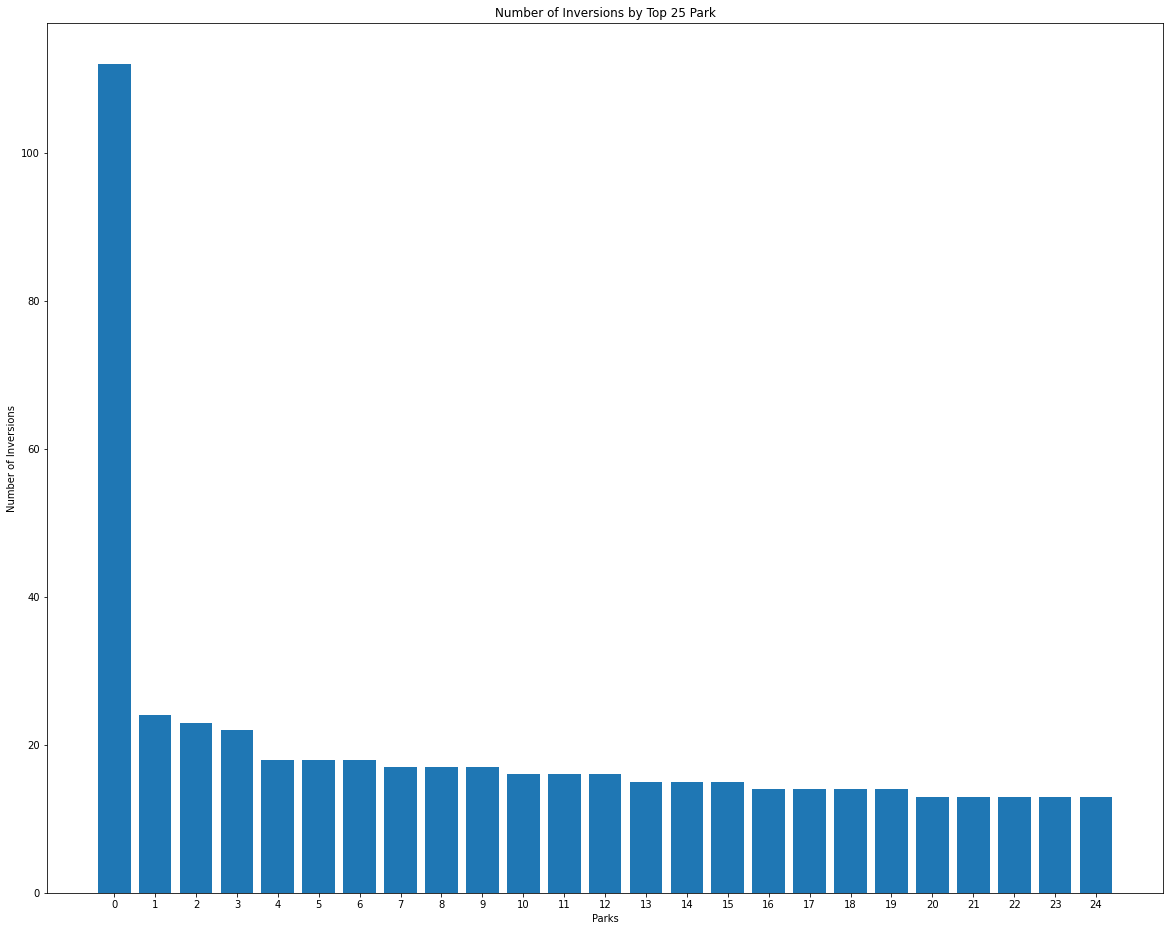

In [490]:
plt.figure(figsize=(20,16))
ax = plt.subplot()
inversion_by_parks_sorted_for_graphing = inversion_by_parks_sorted[0:25]
ax.set_xticks(list(range(len(list(inversion_by_parks_sorted_for_graphing)))))
plt.bar(list(range(len(list(inversion_by_parks_sorted_for_graphing)))), list(inversion_by_parks_sorted_for_graphing))
plt.xlabel('Parks')
plt.ylabel('Number of Inversions')
plt.title('Number of Inversions by Top 25 Park')
plt.show()